# First Jupyter notebook
Welcome to your first jupyter notebook! The first thing to know about Jupyter notebooks is that there are two kinds of cells. This is a markdown cell.

There are a lot of different ways to mark up the text in markdown cells, including __bold__ and *italics*.

The next one will be a `code` cell.

In [1]:
import pandas as pd

Load data

In [2]:
df = pd.read_excel('../Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.shape

(30000, 25)

# Find and remove dupe id rows with no data

Data consists of one month of credit card balances. A basic quality check is to make sure that we have data for as many accounts as we think we do. In particular, account IDs should all be distinct. We can check to see the number of distinct ID's with the Pandas function `.nunique()`.

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df['ID'].nunique()

29687

In [5]:
df.shape

(30000, 25)

Has less than the number of rows, so there are some duplicates somewhere.

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head()

e50d8395-da32    2
4534975d-bf92    2
a3a5c0fc-fdd6    2
0d66d575-c461    2
fd6033f4-cc72    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [11]:
dupe_mask = id_counts == 2

In [12]:
dupe_mask[0:5]

e50d8395-da32    True
4534975d-bf92    True
a3a5c0fc-fdd6    True
0d66d575-c461    True
fd6033f4-cc72    True
Name: ID, dtype: bool

In [21]:
id_counts.index[0:5]

Index(['e50d8395-da32', '4534975d-bf92', 'a3a5c0fc-fdd6', '0d66d575-c461',
       'fd6033f4-cc72'],
      dtype='object')

In [17]:
dupe_ids = id_counts.index[dupe_mask]

In [18]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [19]:
dupe_ids[0:5]

['e50d8395-da32',
 '4534975d-bf92',
 'a3a5c0fc-fdd6',
 '0d66d575-c461',
 'fd6033f4-cc72']

In [16]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
14724,a3a5c0fc-fdd6,70000,2,2,2,55,0,0,0,0,...,42946,43843,44714,2230,2004,1537,1589,1598,1654,0
14824,a3a5c0fc-fdd6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14850,4534975d-bf92,240000,1,1,1,39,-1,-1,-1,-1,...,15980,0,9060,3000,7104,15980,0,9060,3935,0
14950,4534975d-bf92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19064,e50d8395-da32,30000,2,2,1,31,1,2,2,0,...,29400,30000,0,1949,0,1000,600,0,0,0
19164,e50d8395-da32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see some duplicates here, and it looks like every duplicate ID has one row with data, and another row with all zeros. Is this the case for every duplicate ID? Let's check.

In [23]:
df.shape

(30000, 25)

In [24]:
df_zero_mask = df == 0

In [25]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [17]:
sum(feature_zero_mask)

315

It looks like there are at least as many; perhaps some of the rows with missing 'PAY_1' data, that we removed, also had some duplicates with zero data present. Let's remove all the rows with all zero features, and see the result.

In [29]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [30]:
df_clean_1.shape

(29685, 25)

In [31]:
df_clean_1['ID'].nunique()

29685

Looks like this worked.

# More general exploration

In [32]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [33]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

# One of the supposedly numeric rows is an 'object'
First, should review the data dictionary. Then for this column, the giveaway is that it's a different data type.

Explore to learn this contains not only integers, but also a string:

In [35]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Let's throw out these missing values, which were initially hidden from us, now.

In [36]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [37]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [38]:
sum(valid_pay_1_mask)

26664

In [41]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [42]:
df_clean_2.shape

(26664, 25)

In [43]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [44]:
# df_clean_1.info()

In [45]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [46]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


# Feature exploration, continued

In [50]:
import matplotlib.pyplot as plt #plotting
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119539780>,
      dtype=object)

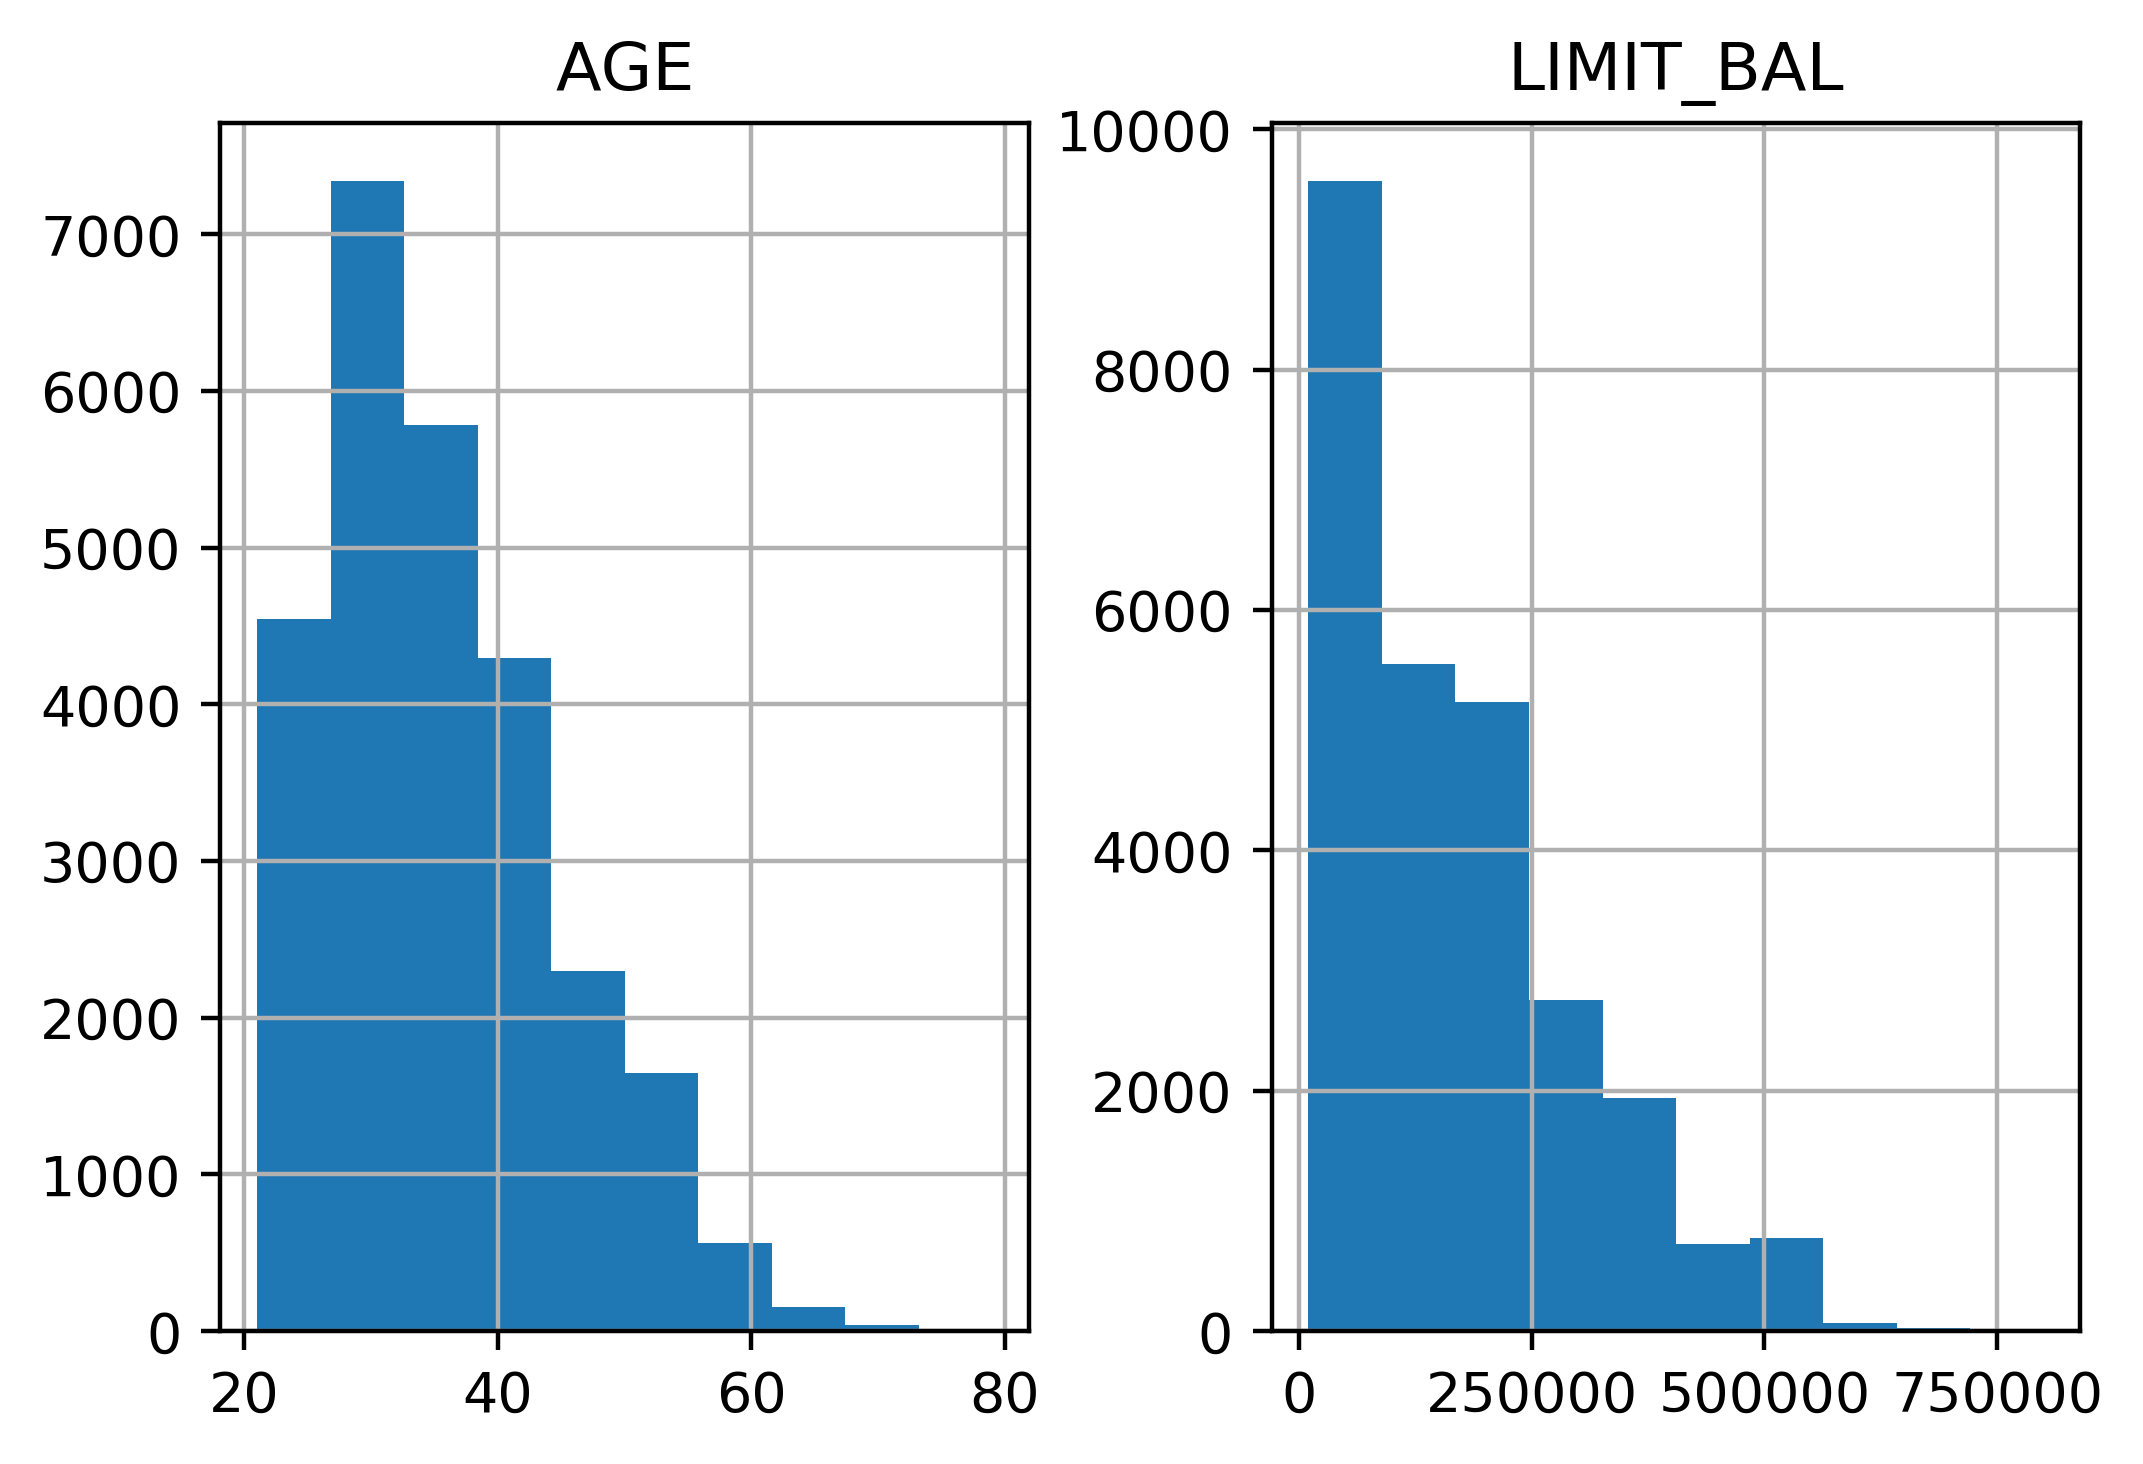

In [51]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [52]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


# Reassign levels missing from data dictionary
For EDUCATION and MARRIAGE

# Explore Education feature

In [54]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

Assign unknown categories to other.

In [55]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [56]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [59]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [60]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [61]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Quick look at response across EDUCATION

In [57]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

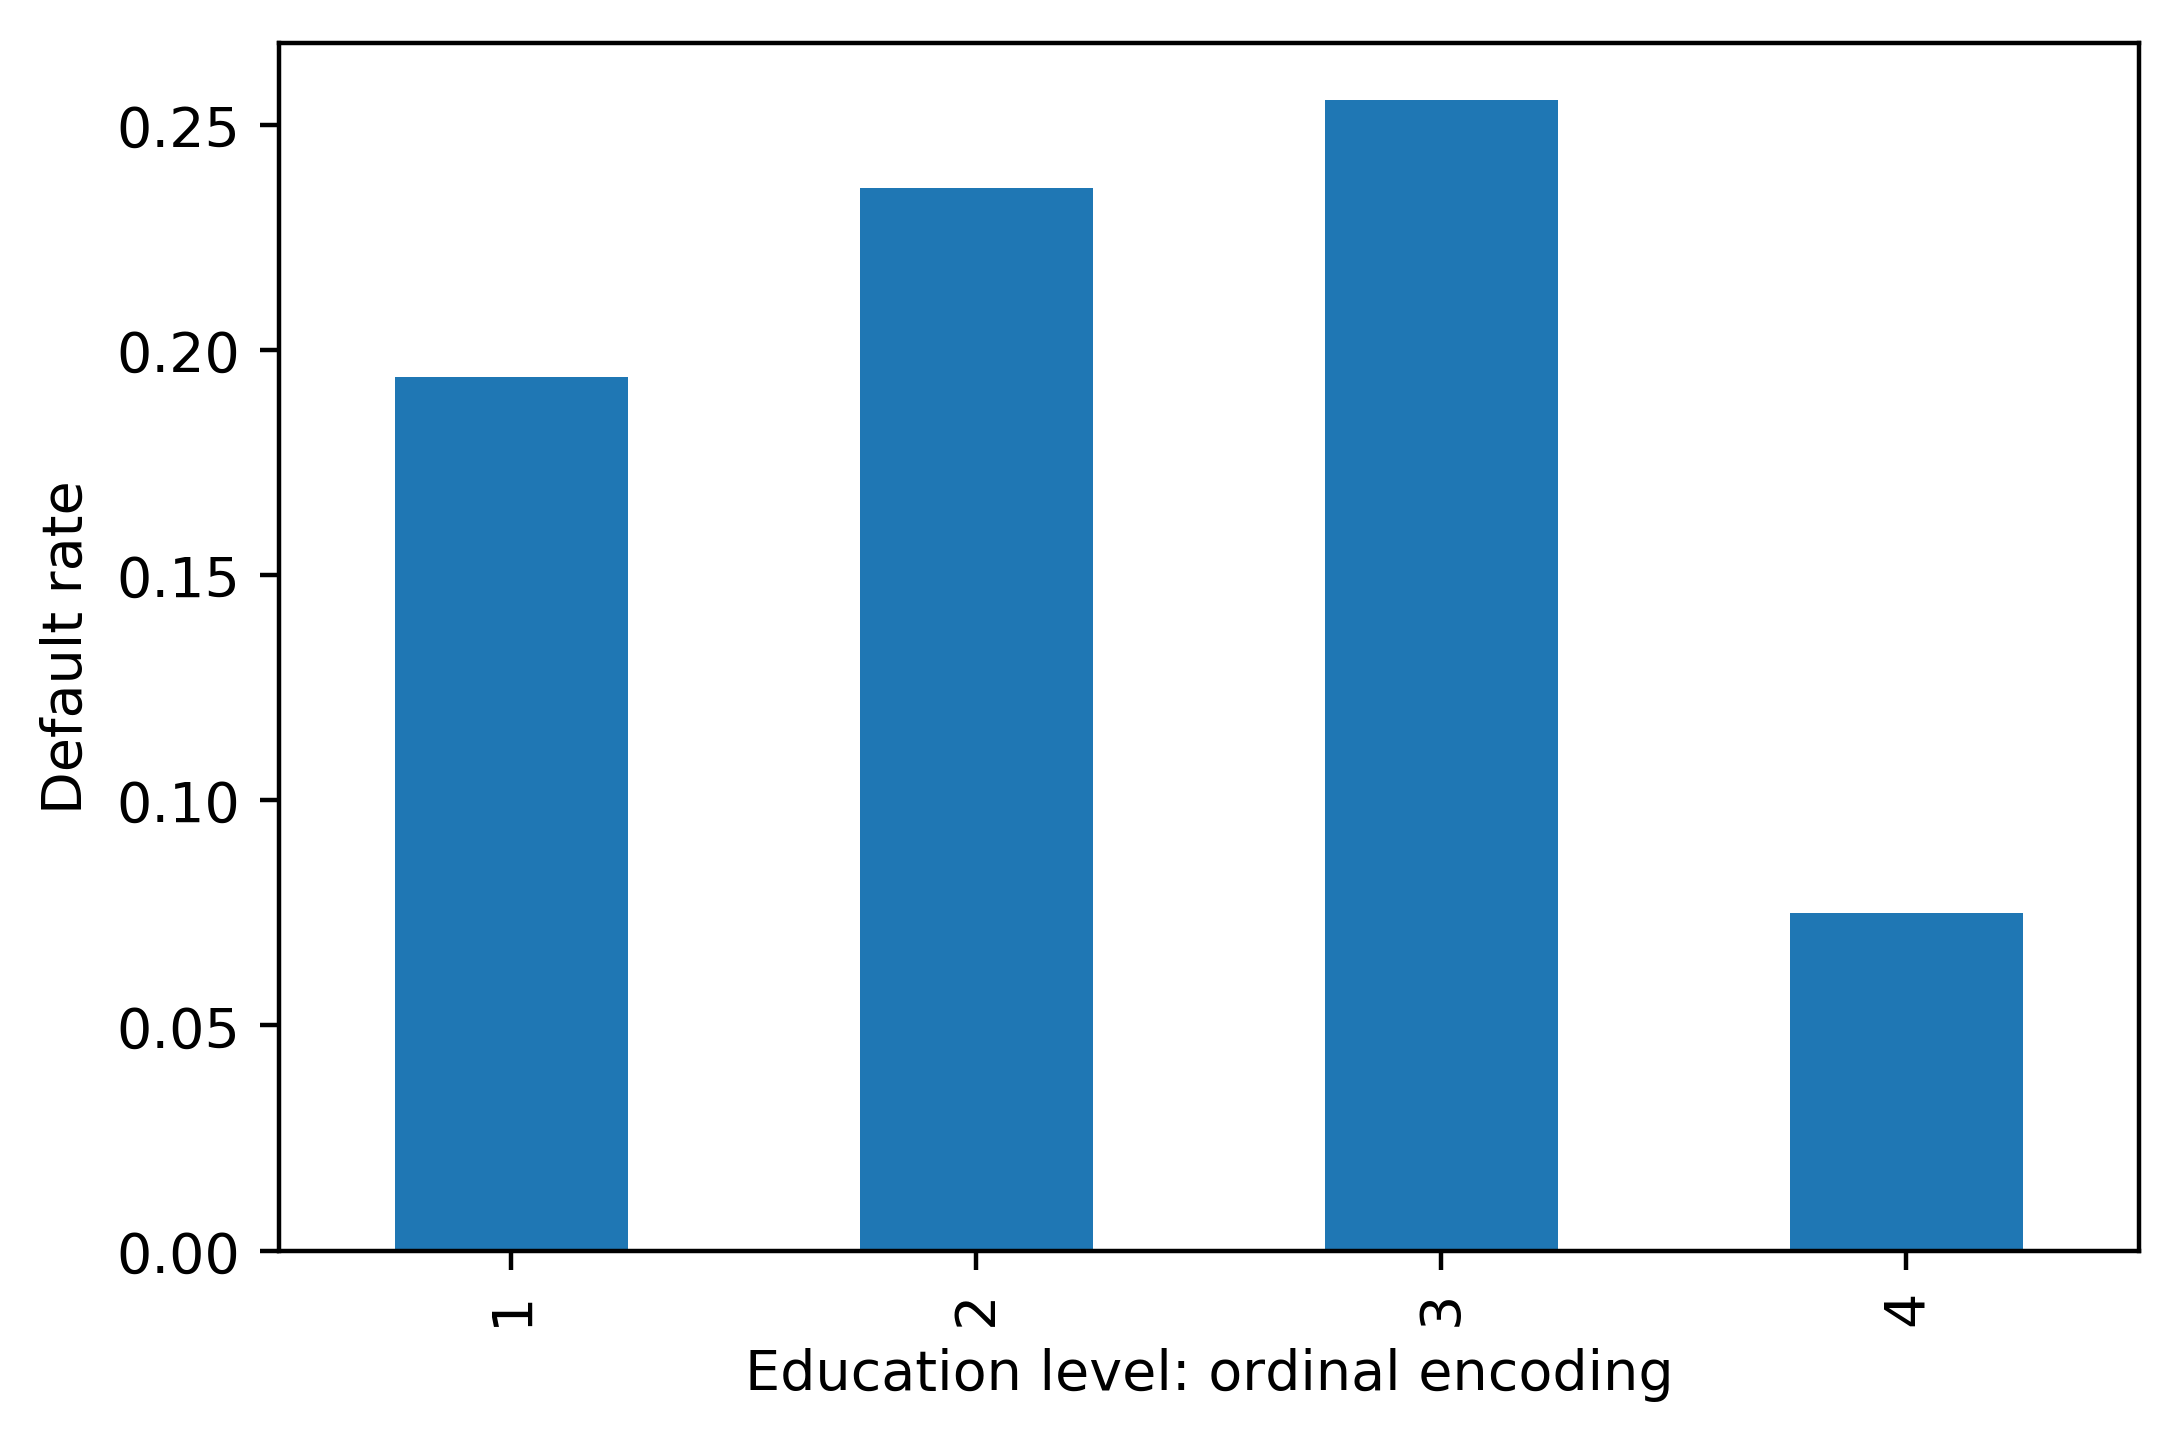

In [58]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

# Hypothetical categorial features

In [65]:
from scipy import stats
import numpy as np

Generate some fake near-linear data:

In [66]:
X = np.array(range(1,11))

In [67]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [68]:
np.random.seed(seed=24)
Y = 2*X + np.random.normal(0, 1, 10)

In [69]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X,Y)

Text(0, 0.5, 'Average response within each level')

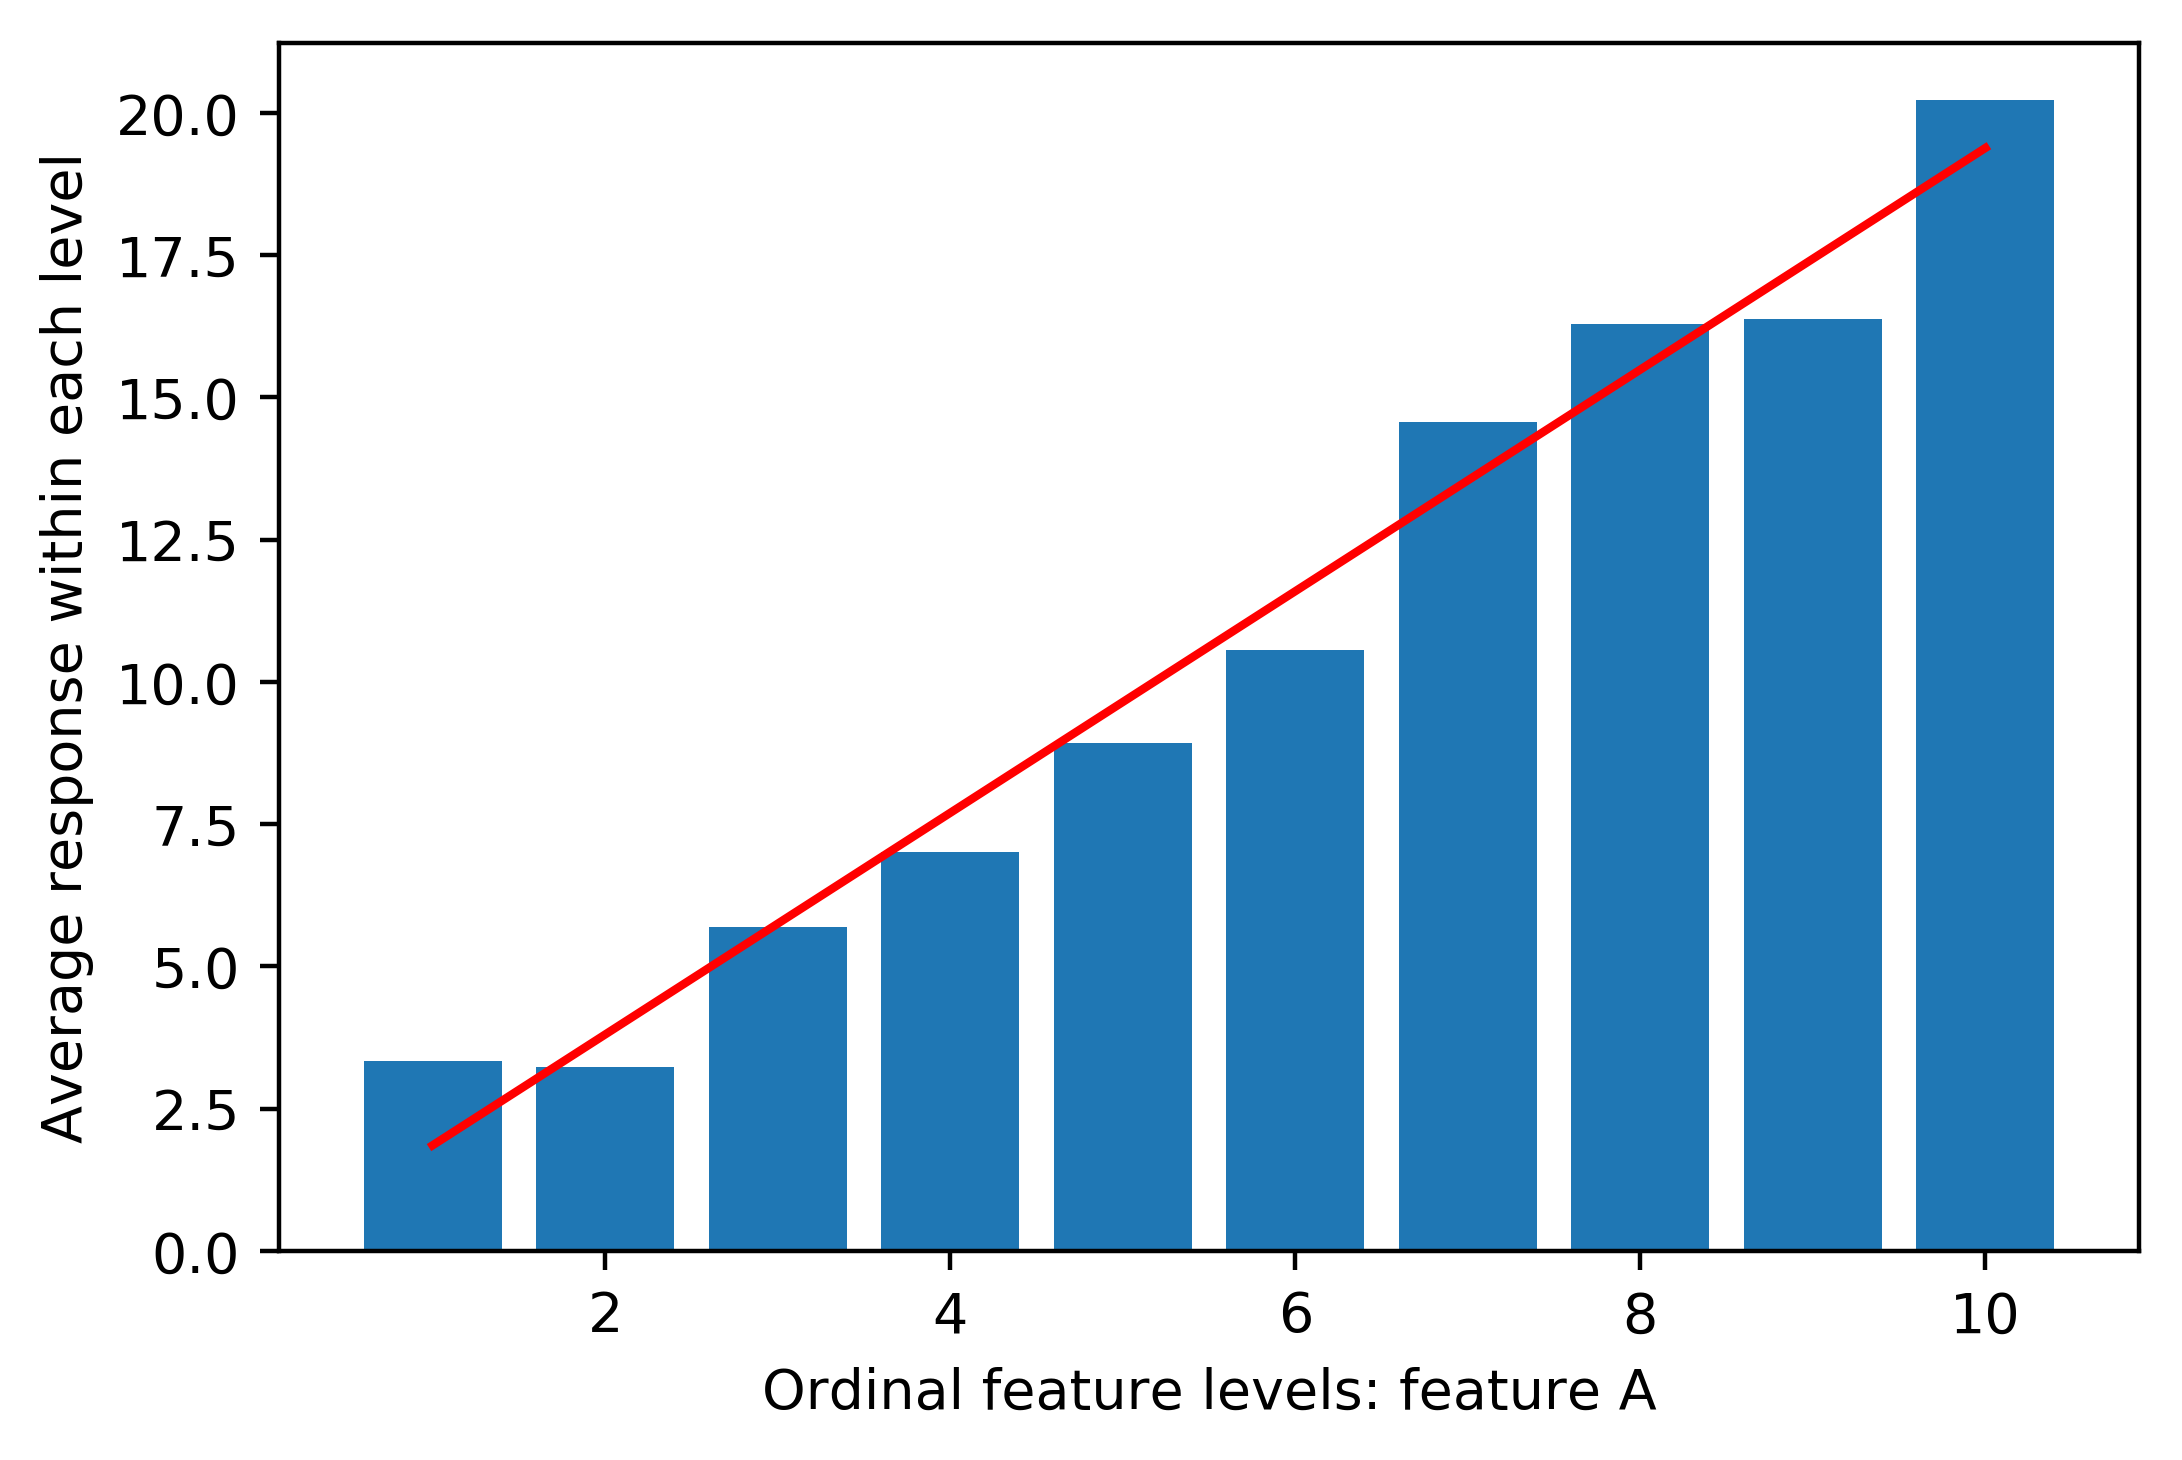

In [70]:
plt.plot(X, intercept_line + slope_line*X, 'r-')
plt.bar(X,Y, align='center')
plt.xlabel('Ordinal feature levels: feature A')
plt.ylabel('Average response within each level')

And some fake polynomial data

In [71]:
np.random.seed(seed=24)
noise = np.random.normal(0, 5, 10)
Y_poly = 2*(X-2)*(X-5.5)*(X-9) + 70 + noise

In [72]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X,Y_poly)

Text(0, 0.5, 'Average response within each level')

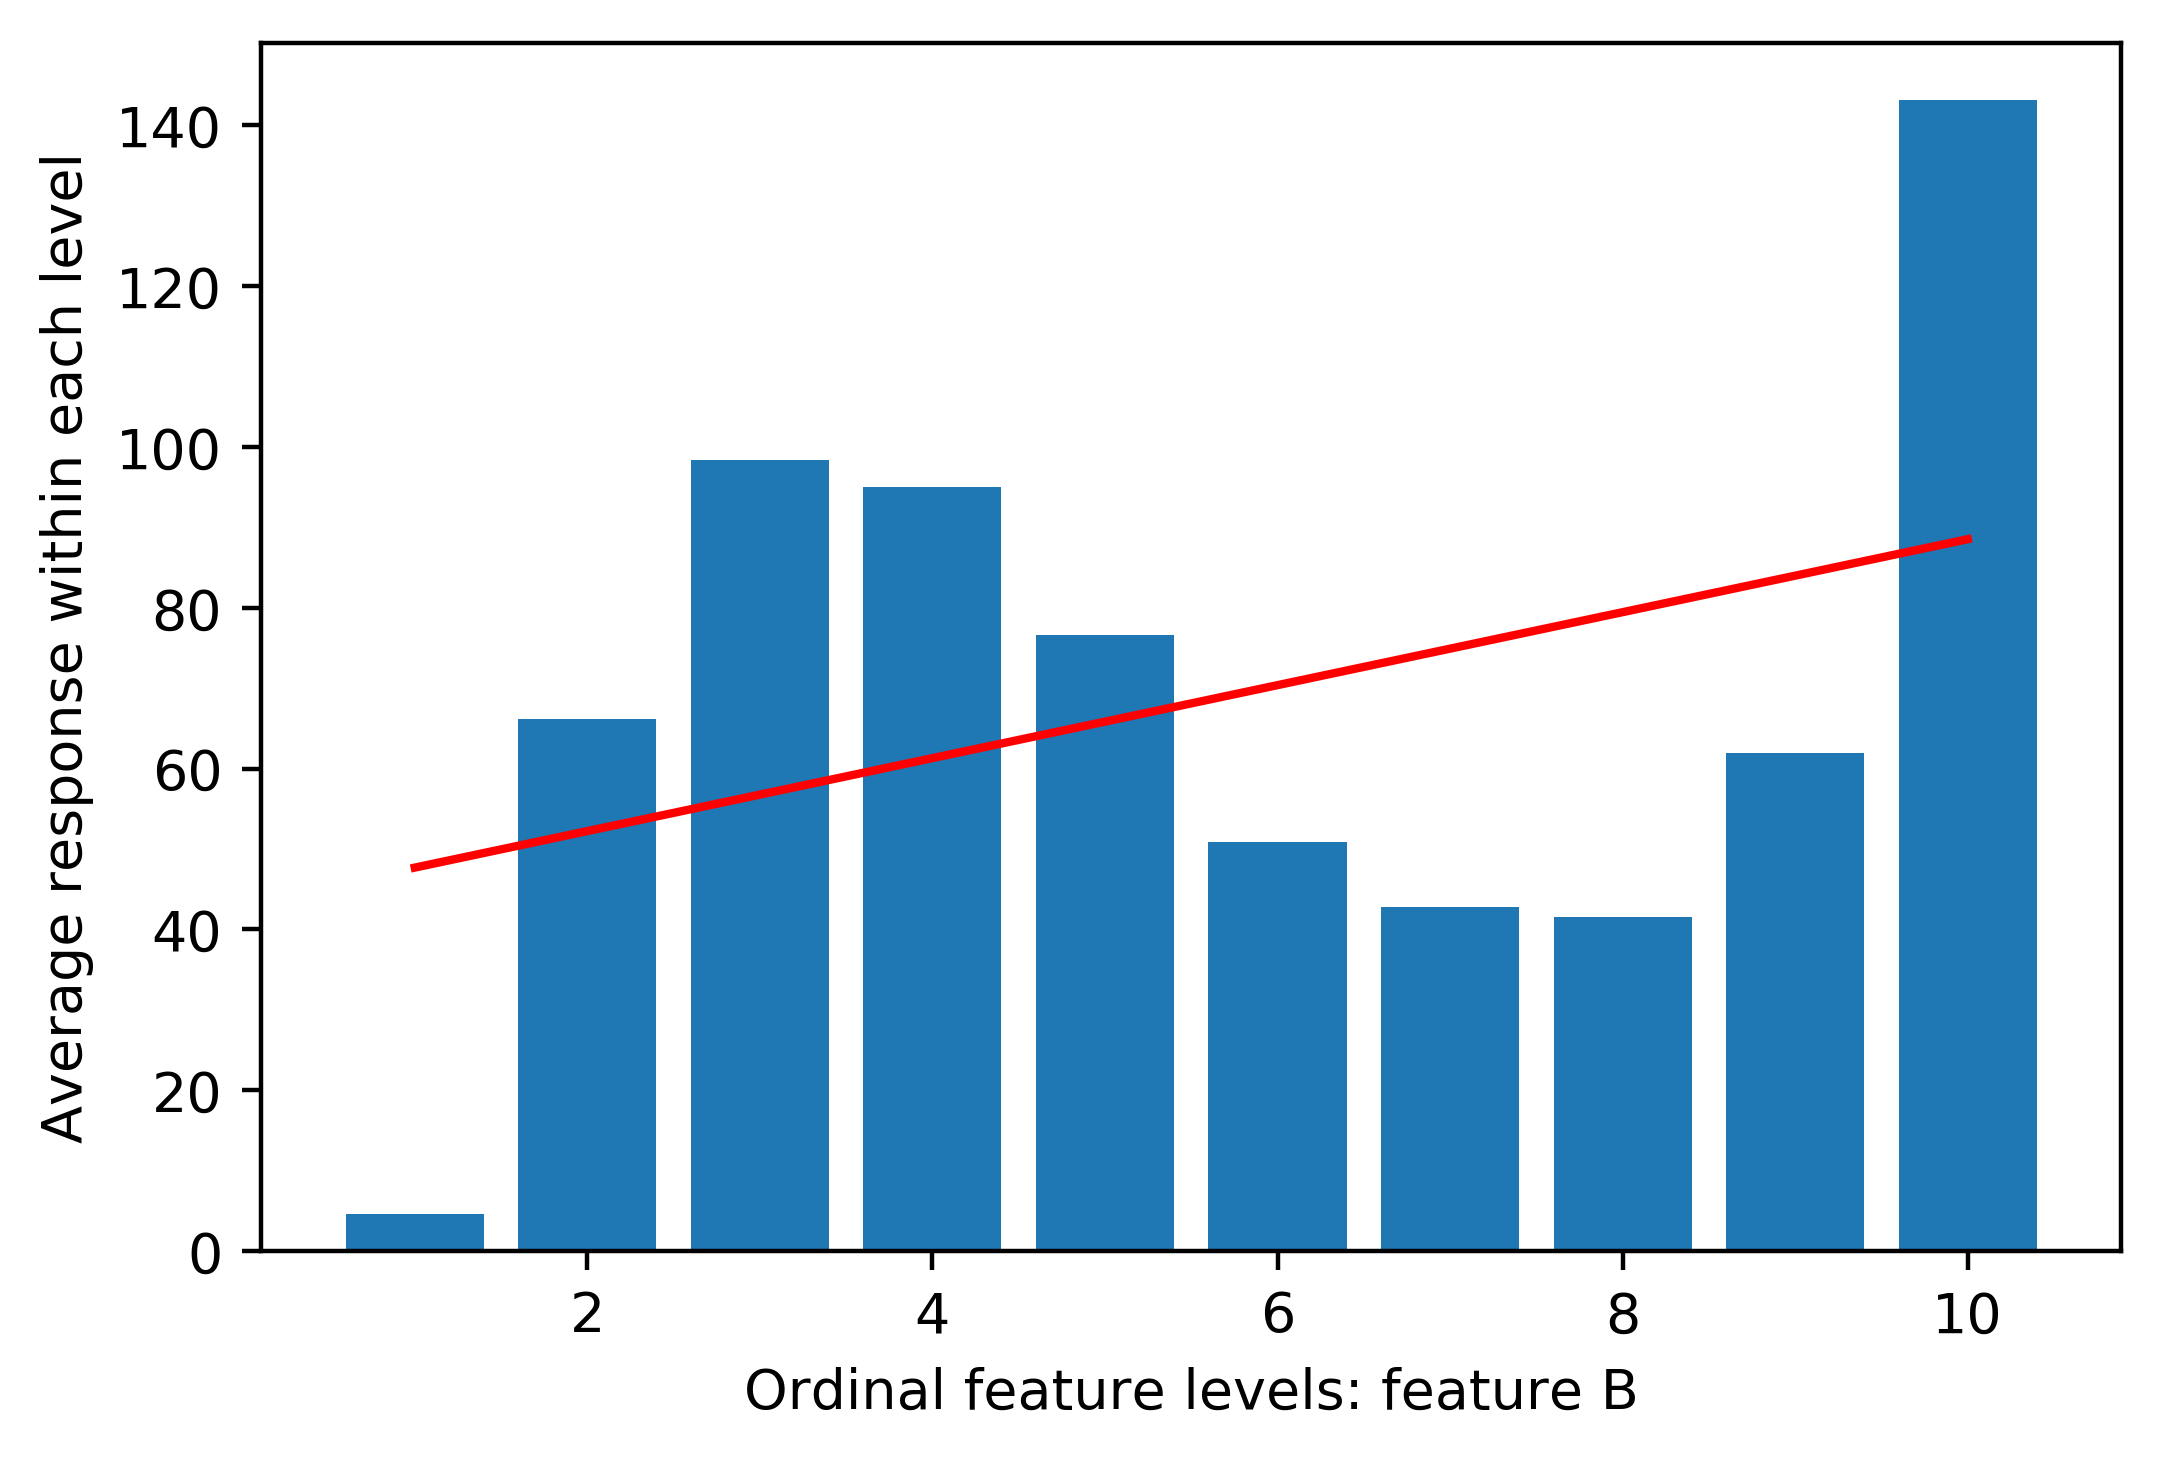

In [73]:
plt.plot(X, intercept_poly + slope_poly*X, 'r-')
plt.bar(X,Y_poly,align='center')
plt.xlabel('Ordinal feature levels: feature B')
plt.ylabel('Average response within each level')

# One Hot Encode the education feature

In [75]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

Make a new column of categorical strings, using the data dictionary

In [76]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [77]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [78]:
df_clean_2.loc[df['EDUCATION'].isin([1]), 'EDUCATION_CAT'] = 'graduate school'
df_clean_2.loc[df['EDUCATION'].isin([2]), 'EDUCATION_CAT'] = 'university'
df_clean_2.loc[df['EDUCATION'].isin([3]), 'EDUCATION_CAT'] = 'high school'
df_clean_2.loc[df['EDUCATION'].isin([4]), 'EDUCATION_CAT'] = 'others'

In [79]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [80]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,none,others,university
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,1,0,0,0,0
6,1,0,0,0,0
7,0,0,0,0,1
8,0,1,0,0,0
9,0,1,0,0,0


In [93]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


# Save the fruits of your exploratory labors

In [94]:
df_with_ohe.to_csv('../Data/Chapter_1_cleaned_data.csv', index=False)

# Scikit-Learn intro

In [81]:
#Import the class
from sklearn.linear_model import LogisticRegression

In [82]:
#Create an object
my_lr = LogisticRegression()

In [83]:
#Examine it
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
#Instantiate while specifying keyword arguments
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [86]:
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
X = df_clean_2['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [88]:
y = df_clean_2['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
new_X = df_clean_2['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [91]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
df_clean_2['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

# Linear regression on synthetic data

In [41]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [42]:
type(X)

numpy.ndarray

In [43]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

In [44]:
mpl.rcParams['figure.dpi'] = 400

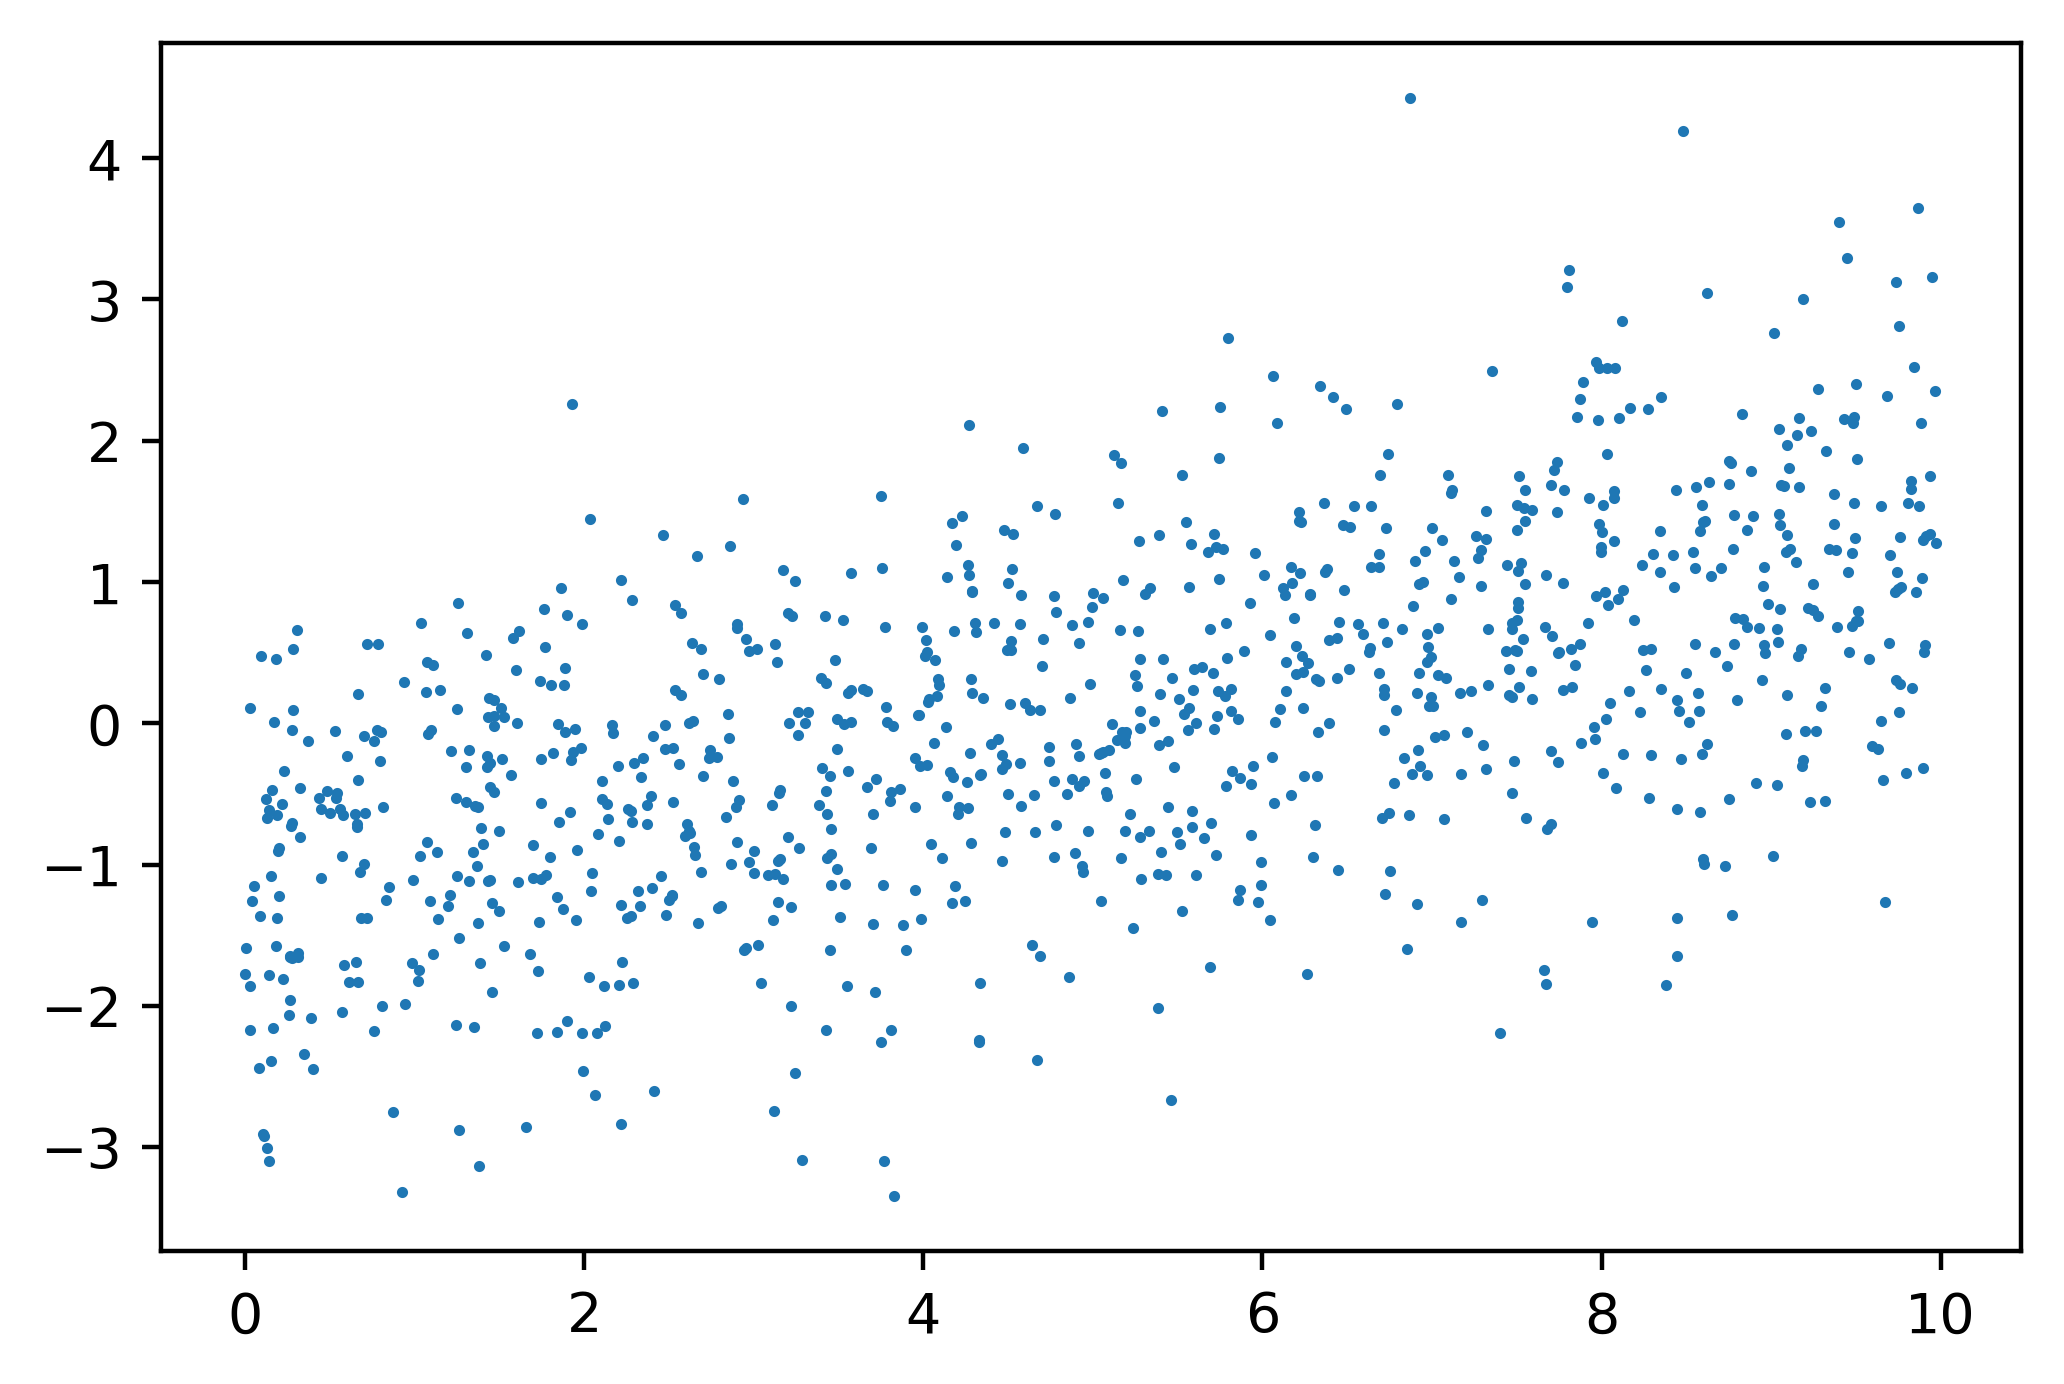

In [45]:
plt.scatter(X,y,s=1)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lin_reg = LinearRegression()

In [48]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [51]:
y_pred = lin_reg.predict(X.reshape(-1,1))

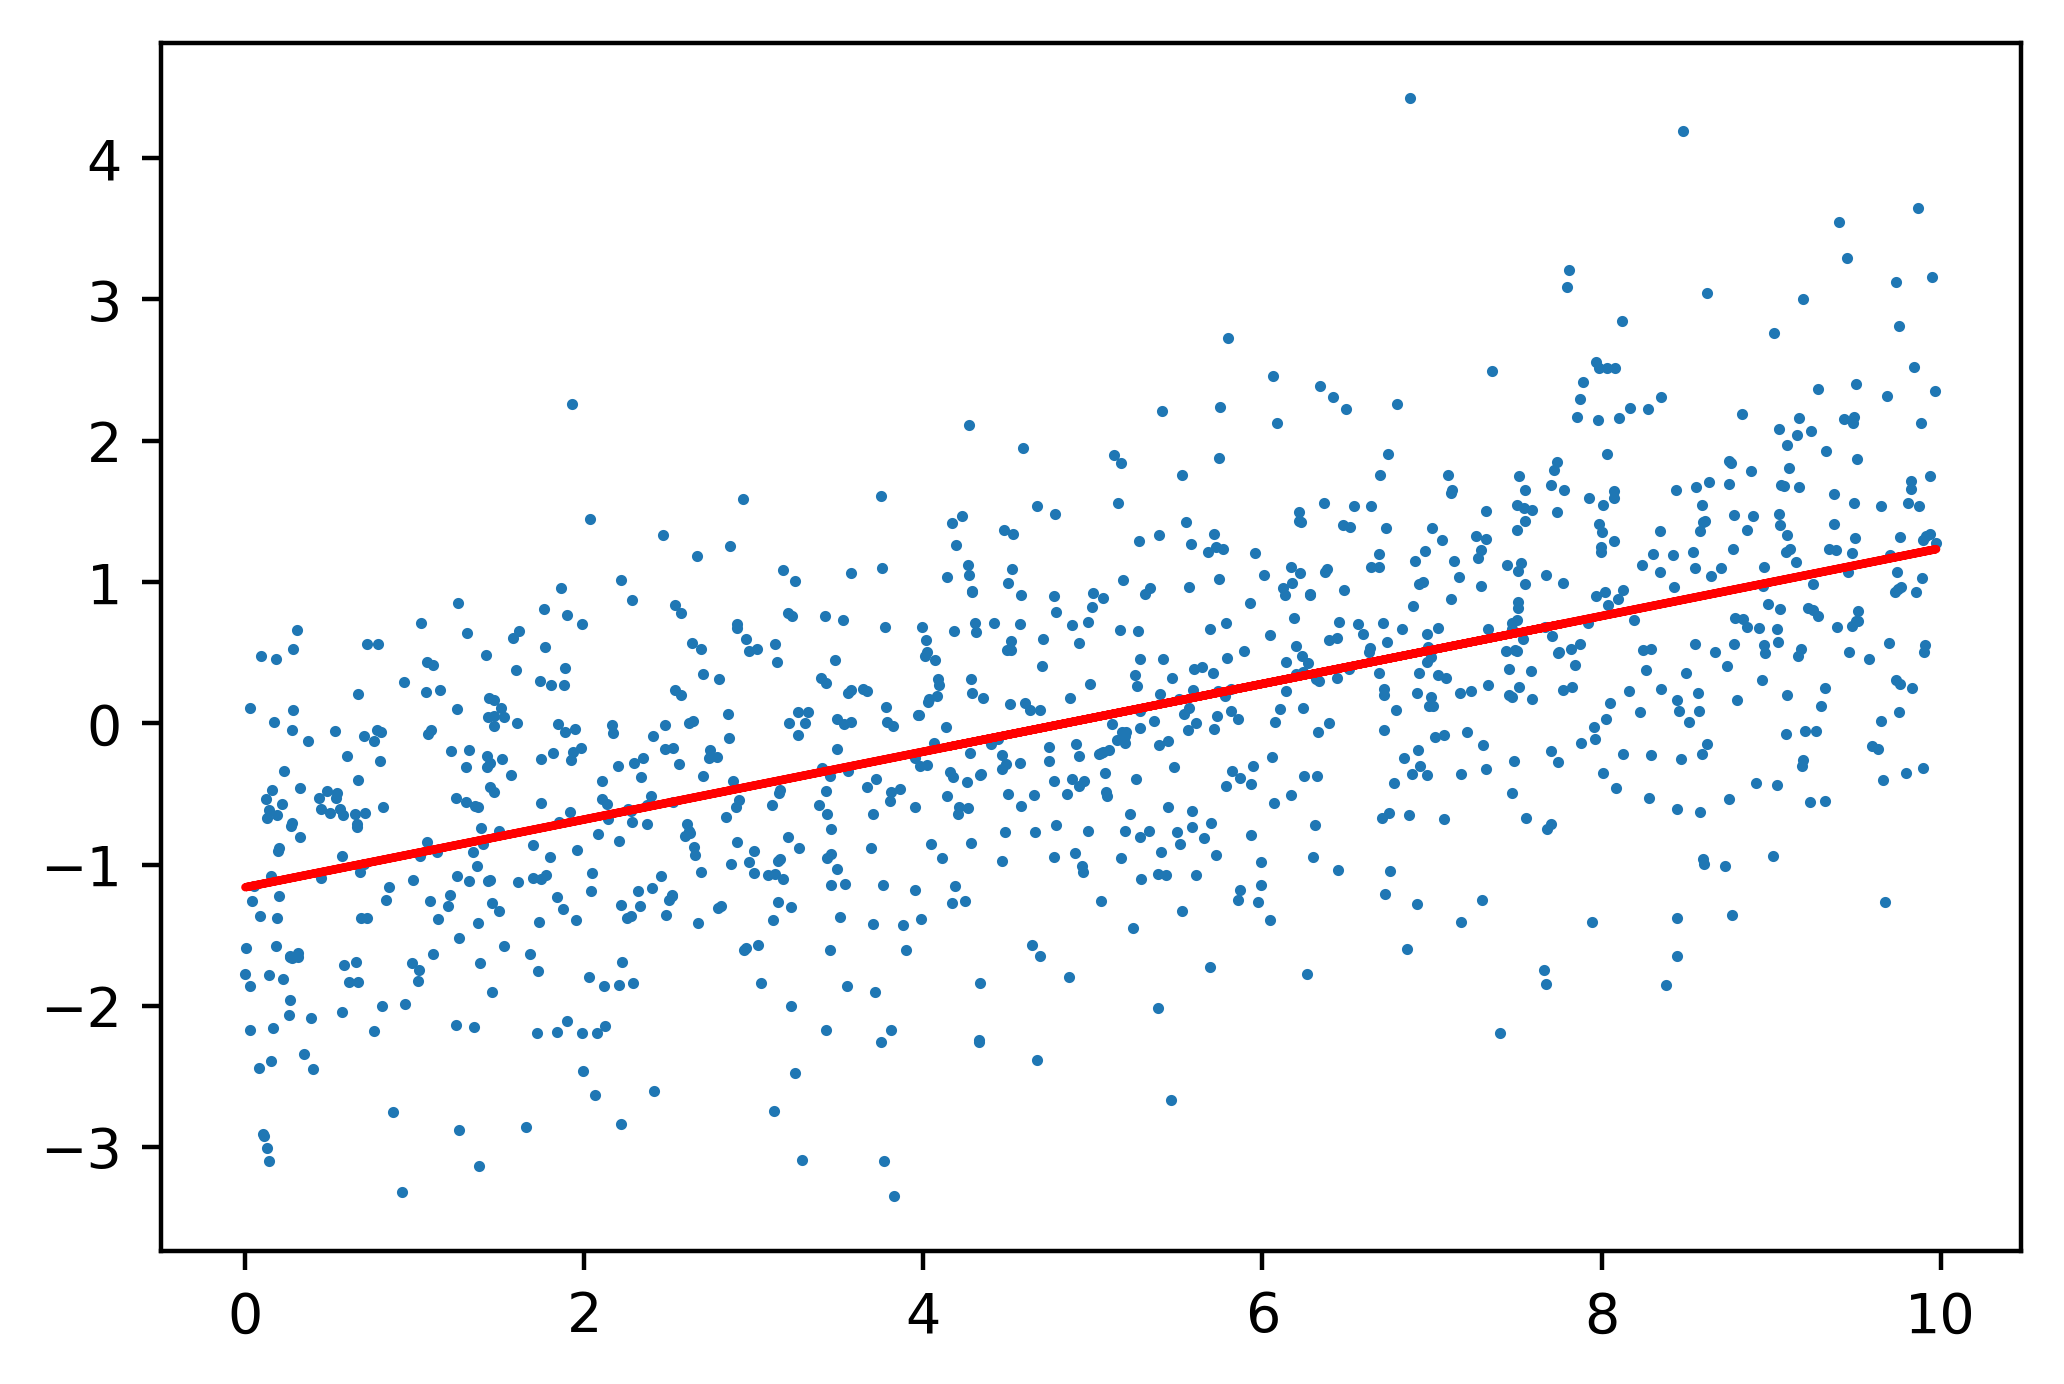

In [52]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')